In [ ]:
#K-Nearest Neighbors Classification From Scratch in Python
#No Scikit Learn, TensorFlow or other ML libraries
#Using numpy to work with arrays and matplotlib for visualisation
#implement distance measure and fit and predict funtionality from scratch
#using k nearest neighbours to determine class of a new point
#takes new point, and looks at k nearest neightbours.
#calculates distance to all points, takes k nearest points, class it has is the class the majority of nearer points have
#distance is euclidian distance, which takes into account with how many dimensions present
#no training happens here, work happens when making predictions
#the Knn classification model is the data itself
#using kaggle dataset for diabetes https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download
#diabetes dataset idenfities whether a person will have diabetes or not
#Seaborn is a Python data visualization library based on matplotlib.

In [7]:
import pandas as pd
import seaborn as sns
import numpy as numpy
import matplotlib.pyplot as plt
from collections import Counter

In [1]:
data = pd.read_csv('C:/Users/Danish/Desktop/School Docs/Machine Learning & Neural Networks/MidTerm/diabetes.csv')

NameError: name 'pd' is not defined

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
my_data = data.head(50)

In [11]:
my_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
#find which will be the right features to keep in and which to drop
#[0,120,65,30,60,29.3,0.465, 28] is the data extracted from a hypothetical patient
#THe Glucose and Insulin data is input in the user_data: [120,60]
user_data = [120,60]

In [13]:
my_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130018,0.169781,-0.416309,-0.336778,-0.189262,-0.247424,0.424263,0.005763
Glucose,0.130018,1.000000,0.193043,-0.053832,0.391687,0.191799,0.202754,0.376963,0.361333
BloodPressure,0.169781,0.193043,1.000000,0.066629,0.029166,0.160339,-0.030982,0.370155,0.072397
SkinThickness,-0.416309,-0.053832,0.066629,1.000000,0.413277,0.356439,0.293756,0.041375,0.339655
Insulin,-0.336778,0.391687,0.029166,0.413277,1.000000,0.111848,0.070243,0.312339,0.279809
BMI,-0.189262,0.191799,0.160339,0.356439,0.111848,1.000000,0.294135,0.005285,0.248838
DiabetesPedigreeFunction,-0.247424,0.202754,-0.030982,0.293756,0.070243,0.294135,1.000000,0.063148,0.220851
Age,0.424263,0.376963,0.370155,0.041375,0.312339,0.005285,0.063148,1.000000,0.203539
Outcome,0.005763,0.361333,0.072397,0.339655,0.279809,0.248838,0.220851,0.203539,1.000000


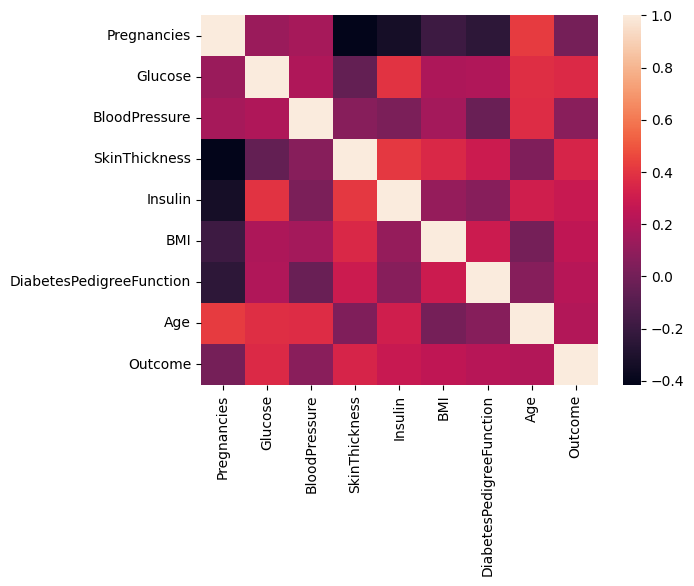

In [14]:
sns.heatmap(my_data.corr());

In [15]:
#from above map, we can see glucose and insulin highly affects the out or target varaible
#lets choose glucose and insulin for our kNN

In [16]:
new_data = my_data.drop('Pregnancies', axis=1)

In [17]:
new_data1 = new_data.drop('SkinThickness', axis=1)
new_data2 = new_data1.drop('BloodPressure', axis=1)
new_data3 = new_data2.drop('BMI', axis=1)
new_data4 = new_data3.drop('Age', axis=1)
new_data5 = new_data4.drop('DiabetesPedigreeFunction', axis=1)

In [18]:
new_data5

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1
5,116,0,0
6,78,88,1
7,115,0,0
8,197,543,1
9,125,0,1


In [19]:
my_newdata = new_data5.drop('Outcome',axis=1)

In [20]:
my_newdata

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,89,94
4,137,168
5,116,0
6,78,88
7,115,0
8,197,543
9,125,0


In [21]:
#Add a value, say [100,60] the glucose and insulin levels

In [22]:
columns = list(my_newdata)

In [23]:
columns

['Glucose', 'Insulin']

In [24]:
#Now, let's go through the data and find the distance between the user's point and the all other points or values of glucose and insulin

In [25]:
data_arr = []
dist_arr = []

for i in range (0,50):
    for j in columns:
        print(my_newdata[j][i])
        elem = my_newdata[j][i]
        data_arr.append(elem)
    print(data_arr)
    #The following line calculates the Euclidean distance between user_data (a predefined point) and the current data point stored in data_arr
    dist = ((user_data[0]-data_arr[0]) **2 + (user_data[1]-data_arr[1]) **2) **0.5
    dist_arr.append(dist)
    data_arr = []

148
0
[148, 0]
85
0
[85, 0]
183
0
[183, 0]
89
94
[89, 94]
137
168
[137, 168]
116
0
[116, 0]
78
88
[78, 88]
115
0
[115, 0]
197
543
[197, 543]
125
0
[125, 0]
110
0
[110, 0]
168
0
[168, 0]
139
0
[139, 0]
189
846
[189, 846]
166
175
[166, 175]
100
0
[100, 0]
118
230
[118, 230]
107
0
[107, 0]
103
83
[103, 83]
115
96
[115, 96]
126
235
[126, 235]
99
0
[99, 0]
196
0
[196, 0]
119
0
[119, 0]
143
146
[143, 146]
125
115
[125, 115]
147
0
[147, 0]
97
140
[97, 140]
145
110
[145, 110]
117
0
[117, 0]
109
0
[109, 0]
158
245
[158, 245]
88
54
[88, 54]
92
0
[92, 0]
122
0
[122, 0]
103
192
[103, 192]
138
0
[138, 0]
102
0
[102, 0]
90
0
[90, 0]
111
207
[111, 207]
180
70
[180, 70]
133
0
[133, 0]
106
0
[106, 0]
171
240
[171, 240]
159
0
[159, 0]
180
0
[180, 0]
146
0
[146, 0]
71
0
[71, 0]
103
0
[103, 0]
105
0
[105, 0]


In [26]:
dist_arr

[66.2117814289874,
 69.46221994724903,
 87.0,
 46.010868281309364,
 109.32977636490436,
 60.13318551349163,
 50.47771785649585,
 60.207972893961475,
 489.09917194777586,
 60.207972893961475,
 60.8276253029822,
 76.83749084919418,
 62.93647591023825,
 789.0228133583971,
 123.8587905640936,
 63.245553203367585,
 170.01176429882727,
 61.39218191268331,
 28.600699292150182,
 36.345563690772494,
 175.10282693320517,
 63.56886030125127,
 96.82974749528164,
 60.00833275470999,
 89.02246907382428,
 55.226805085936306,
 65.79513659838392,
 83.24061508662703,
 55.90169943749474,
 60.07495318350236,
 61.0,
 188.86238376129853,
 32.55764119219941,
 66.2117814289874,
 60.03332407921454,
 133.09019498069722,
 62.6418390534633,
 62.6418390534633,
 67.08203932499369,
 147.27525250360293,
 60.8276253029822,
 61.39218191268331,
 61.61168720299745,
 187.0855419320264,
 71.56116265125938,
 84.8528137423857,
 65.39113089708727,
 77.46612162745726,
 62.36184731067546,
 61.84658438426491]

In [27]:
result = pd.DataFrame(dist_arr)

In [28]:
result

,0
0,66.211781
1,69.462220
2,87.000000
3,46.010868
4,109.329776
5,60.133186
6,50.477718
7,60.207973
8,489.099172
9,60.207973


In [29]:
result['Glucose'] = my_newdata['Glucose']

In [30]:
result['Insulin'] = my_newdata['Insulin']
result['Diabetes'] = new_data5['Outcome']

In [31]:
result

,0,Glucose,Insulin,Diabetes
0,66.211781,148,0,1
1,69.462220,85,0,0
2,87.000000,183,0,1
3,46.010868,89,94,0
4,109.329776,137,168,1
5,60.133186,116,0,0
6,50.477718,78,88,1
7,60.207973,115,0,0
8,489.099172,197,543,1
9,60.207973,125,0,1


In [32]:
#For kNN, we need to know the 'K' value. K is usully the square root(total no. of entries)

k = 50 ** 0.5

In [33]:
k

7.0710678118654755

In [34]:
#k value is preferred to be odd number
k = 7

In [35]:
result.nsmallest(10,[0])

,0,Glucose,Insulin,Diabetes
18,28.600699,103,83,0
32,32.557641,88,54,0
19,36.345564,115,96,1
3,46.010868,89,94,0
6,50.477718,78,88,1
25,55.226805,125,115,1
28,55.901699,145,110,0
23,60.008333,119,0,1
34,60.033324,122,0,0
29,60.074953,117,0,0


In [ ]:
#Since the neighbours are 6 non-diabetic and 4 diabetic, the hypothetical patient with 
#[120,60] glucose and insulin level does not have diabetes